In [1]:
from stargazer.stargazer import Stargazer
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

## Functions

In [2]:
def get_info():
    df = pd.read_csv('Databases/Test_file.csv')
    del df['Origin']
    del df['Destination']
    df = dropper(df)
    df = df.dropna()
    return df

In [3]:
def dropper(df):
    nan_value = float("NaN")
    df.replace(0.0, nan_value, inplace=True)
    df.replace('.', nan_value, inplace=True)
    return df

## Main Program
We need to get the DataFrames and prepare them for the models.

In [4]:
base_df = get_info()
base_df = base_df.sort_values(by=['Distance'])
base_df = base_df.reset_index()
del base_df['index']
df_endo = base_df['Commuters'].copy()
df_exo = base_df.copy()
del df_exo['Commuters']

We create a list that we will fill with all the results

In [5]:
set_of_results = []

## General Gravity Model (2014 - 2020)

In [6]:
df_exo_general = sm.add_constant(df_exo.copy())
del df_exo_general['Year']
df_exo_general

,const,Distance,Origin Pop,Destination Pop
0,1.0,-2.302585,10.274258,10.274258
1,1.0,-2.302585,10.272012,10.272012
2,1.0,-2.302585,10.272945,10.272945
3,1.0,-2.302585,10.271701,10.271701
4,1.0,-2.302585,10.274603,10.274603
...,...,...,...,...
81745,1.0,5.569108,10.129347,13.352850
81746,1.0,5.569108,10.113667,13.386523
81747,1.0,5.575949,10.142859,13.343348
81748,1.0,5.701112,11.715025,11.587021


In [7]:
general_OLS_results = sm.OLS(df_endo,df_exo_general).fit(cov_type='HC1')
set_of_results.append(general_OLS_results)

In [9]:
general_OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Commuters   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 2.273e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:57:08   Log-Likelihood:                -84416.
No. Observations:               81750   AIC:                         1.688e+05
Df Residuals:                   81746   BIC:                         1.689e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0262      0.047    -42.926      0.000      -2.119      -1.934
Distance           -1.0512      0.004   -259.671      0.000      -1.059      -1.043
Origin Pop          0.4179      0.003    137.661      0.000       0.412       0.424
Destination Pop     0.5890      0.003    187.197      0.000       0.583       0.595
==============================================================================
Omnibus:                     2637.528   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2900.891
Skew:                           0.461   Prob(JB):                         0.00
Kurtosis:                       3.050   Cond. No.                         268.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [21]:
sm.stats.diagnostic.linear_reset(general_OLS_results, power=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=19510.467694347753, p-value=0.0, df_denom=2>

In [8]:
general_RLM_results = sm.RLM(df_endo, df_exo_general, M=sm.robust.norms.HuberT()).fit()
set_of_results.append(general_RLM_results)

In [10]:
general_RLM_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              Commuters   No. Observations:                81750
Model:                            RLM   Df Residuals:                    81746
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 08 Aug 2022                                         
Time:                        21:57:08                                         
No. Iterations:                    24                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7376      0.041    -42.707      0.000      -1.817      -1.658
Distance           -1.0439      0.003   -335.776      0.000      -1.050      -1.038
Origin Pop          0.4006      0.003    147.298      0.000       0.395       0.406
Destination Pop     0.5747      0.003    213.701      0.000       0.569       0.580
===================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

eval_env: 1


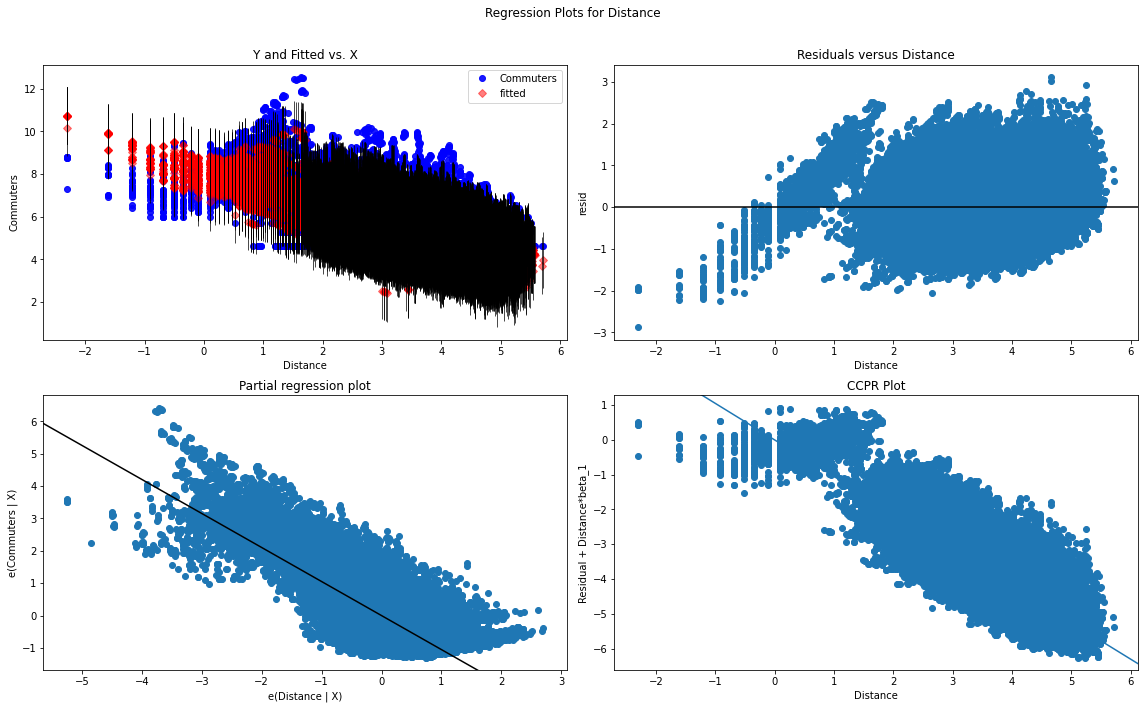

In [11]:
fig = plt.figure(figsize=(16, 10))
fig = sm.graphics.plot_regress_exog(general_OLS_results, 'Distance', fig=fig)
plt.gcf()
plt.savefig('Results/GeneralErrorGrid.png')
plt.show()

## No-COVID Model

In [12]:
covid_df = base_df.copy()
for row in covid_df.itertuples():
    if row.Year == 2020:
        covid_df.at[row.Index, 'Year'] = float("NaN")
covid_df = covid_df.dropna()
del covid_df['Year']

In [13]:
covid_endo_df = covid_df['Commuters'].copy()
del covid_df['Commuters']

In [14]:
results_covid = sm.OLS(covid_endo_df, sm.add_constant(covid_df)).fit()
set_of_results.append(results_covid)
results_covid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Commuters   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 3.537e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:57:13   Log-Likelihood:                -72455.
No. Observations:               70282   AIC:                         1.449e+05
Df Residuals:                   70278   BIC:                         1.450e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0190      0.043    -47.019      0.000      -2.103      -1.935
Distance           -1.0454      0.003   -317.577      0.000      -1.052      -1.039
Origin Pop          0.4174      0.003    145.341      0.000       0.412       0.423
Destination Pop     0.5871      0.003    206.419      0.000       0.582       0.593
==============================================================================
Omnibus:                     2286.292   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2516.413
Skew:                           0.463   Prob(JB):                         0.00
Kurtosis:                       3.051   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sm.stats.diagnostic.linear_reset(results_covid, power=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=16783.189461409376, p-value=0.0, df_denom=2>

eval_env: 1


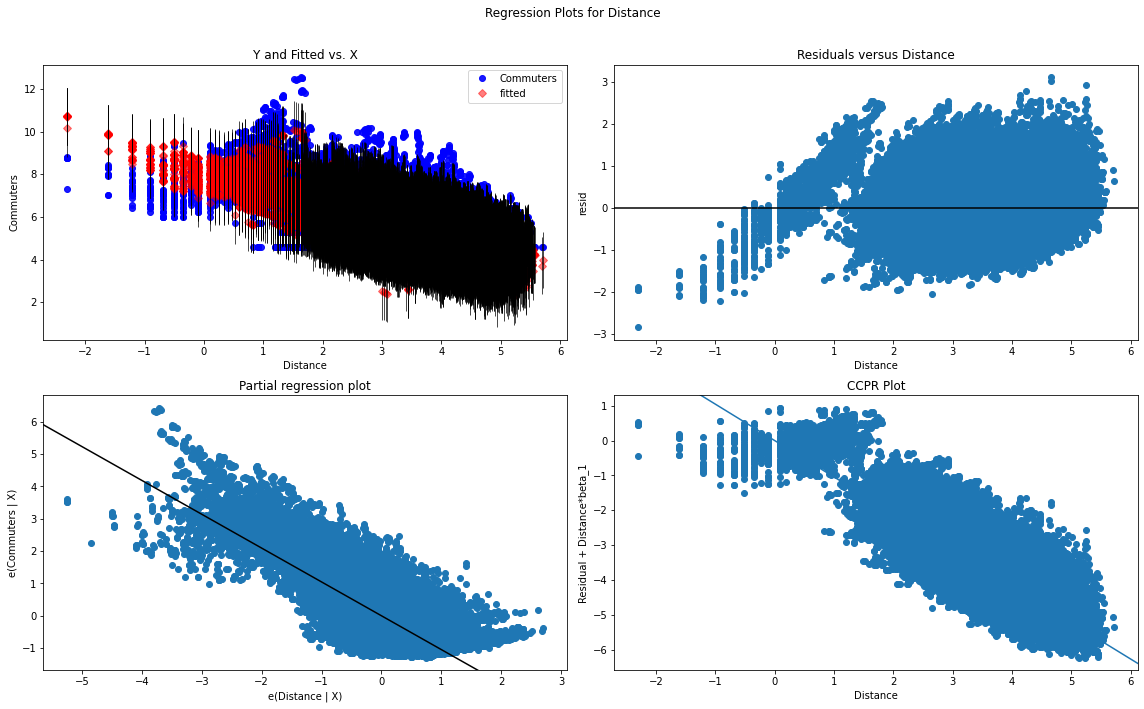

In [15]:
fig = plt.figure(figsize=(16, 10))
fig = sm.graphics.plot_regress_exog(results_covid, 'Distance', fig=fig)
plt.gcf()
plt.savefig('Results/COVIDErrorGrid.png')
plt.show()

## Partial Models (Yearly)

Partial Gravity Model of 2014 

<Wald test (chi2): statistic=1492.3216449374627, p-value=0.0, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.394e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:46   Log-Likelihood:                         -12164.
No. Observations:               11719   AIC:                                  2.433e+04
Df Residuals:                   11716   BIC:                                  2.436e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                                  
              

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


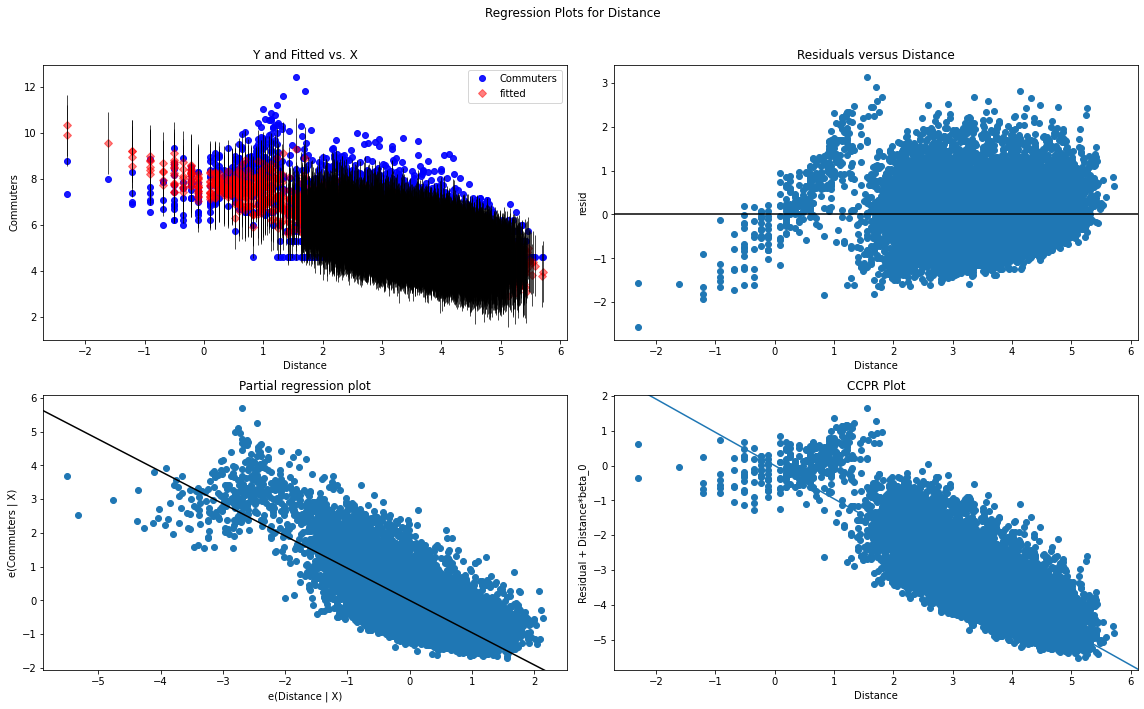

Partial Gravity Model of 2015 

<Wald test (chi2): statistic=1430.3975106080816, p-value=2.4724476641393e-311, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.395e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:47   Log-Likelihood:                         -12078.
No. Observations:               11651   AIC:                                  2.416e+04
Df Residuals:                   11648   BIC:                                  2.419e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                                

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


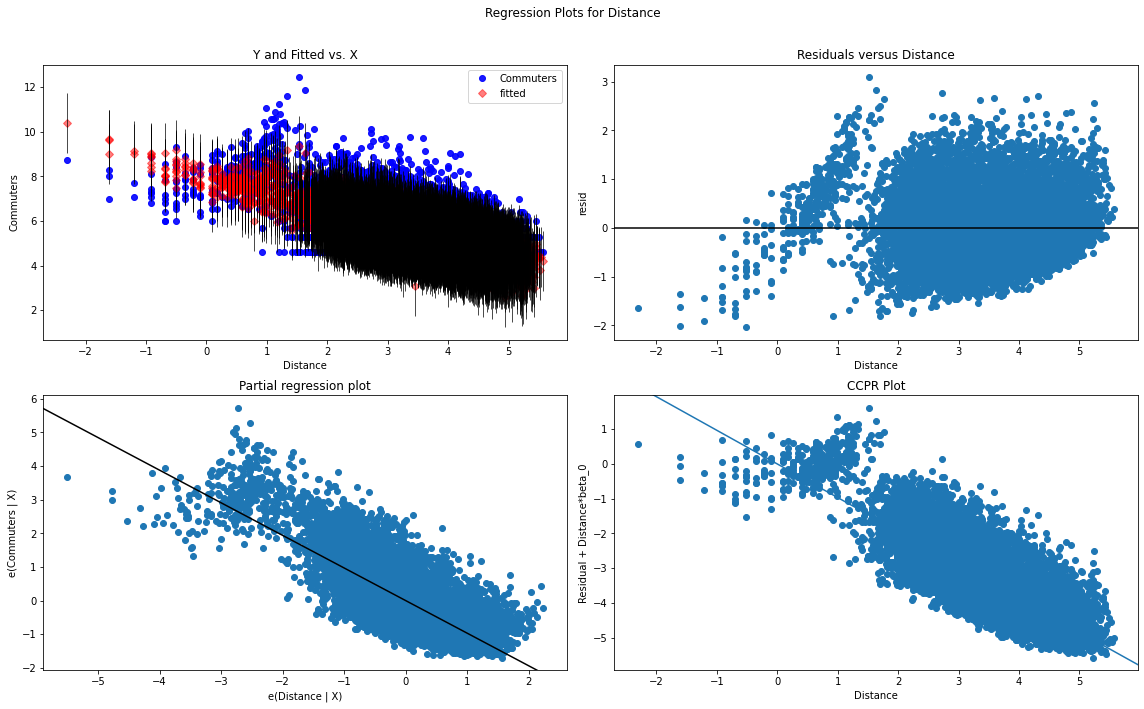

Partial Gravity Model of 2016 

<Wald test (chi2): statistic=1310.3397866387236, p-value=2.9062342876565735e-285, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.371e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:49   Log-Likelihood:                         -12210.
No. Observations:               11702   AIC:                                  2.443e+04
Df Residuals:                   11699   BIC:                                  2.445e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                             

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


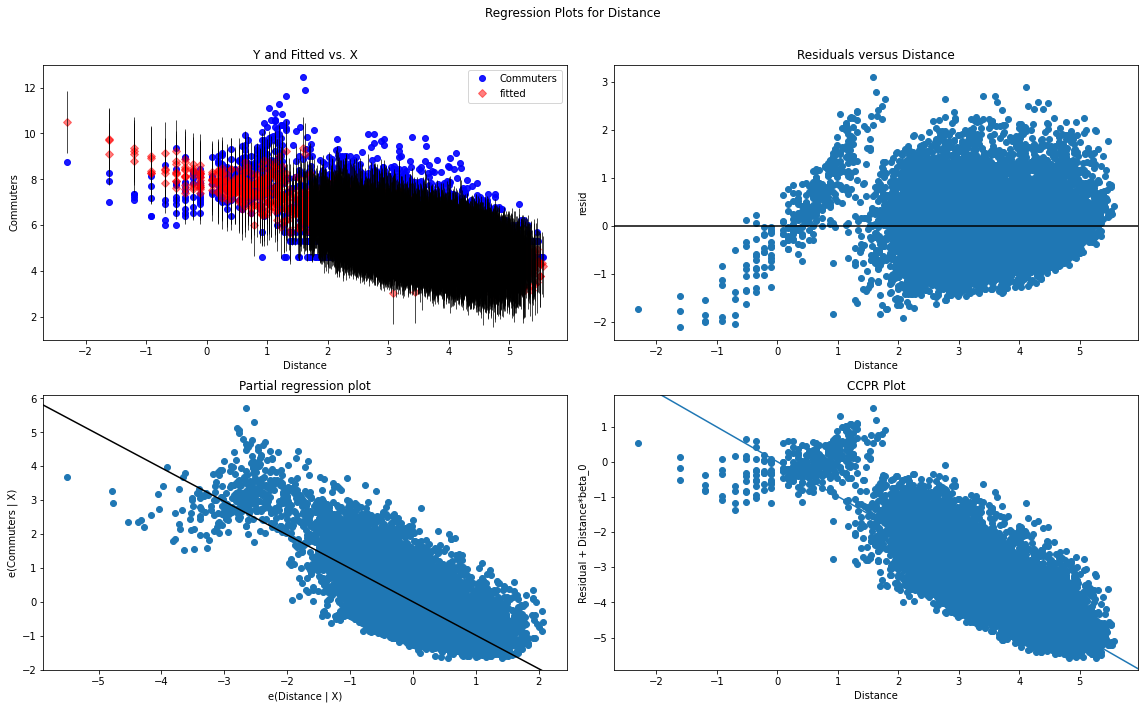

Partial Gravity Model of 2017 

<Wald test (chi2): statistic=1141.6886846343073, p-value=1.2174527246564174e-248, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.427e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:50   Log-Likelihood:                         -12280.
No. Observations:               11793   AIC:                                  2.457e+04
Df Residuals:                   11790   BIC:                                  2.459e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                             

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


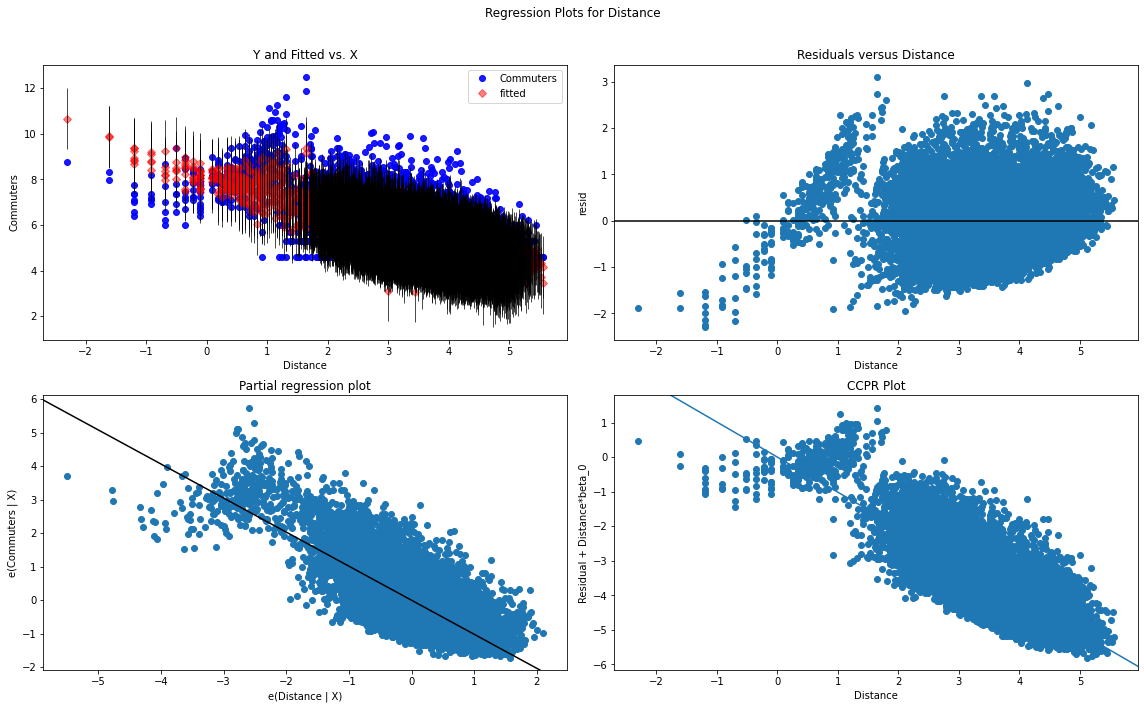

Partial Gravity Model of 2018 

<Wald test (chi2): statistic=1302.9881296879485, p-value=1.1474206076669467e-283, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.378e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:51   Log-Likelihood:                         -12527.
No. Observations:               11877   AIC:                                  2.506e+04
Df Residuals:                   11874   BIC:                                  2.508e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                             

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


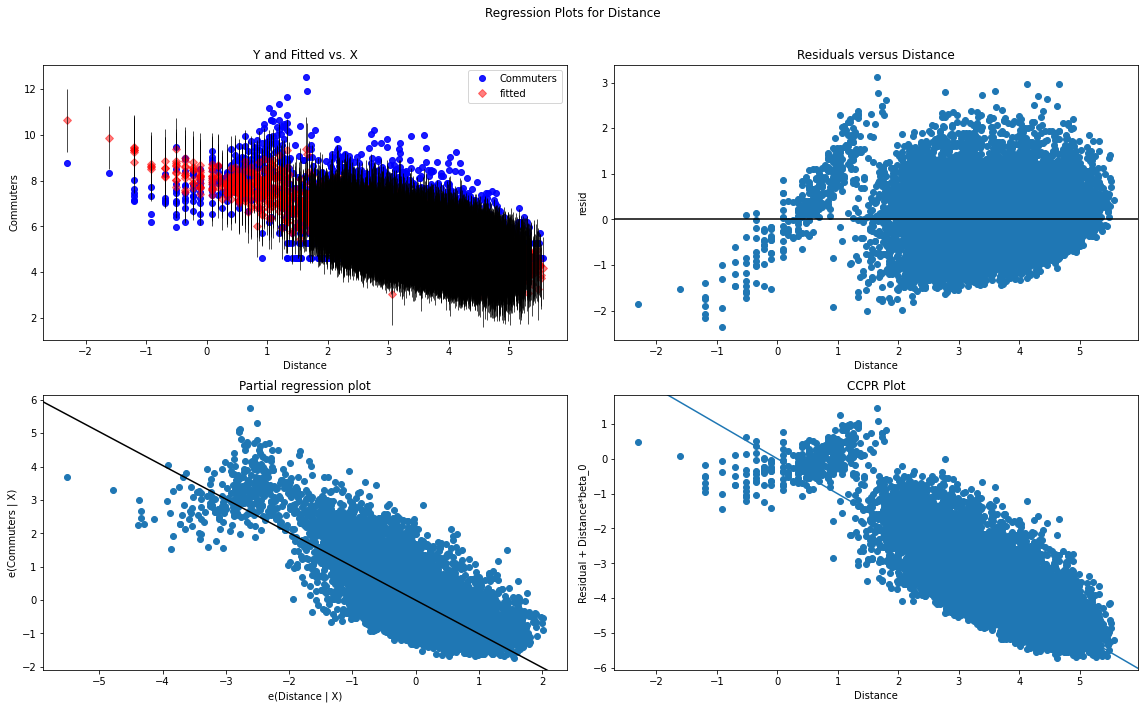

Partial Gravity Model of 2019 

<Wald test (chi2): statistic=1288.8495569693143, p-value=1.3485737515868187e-280, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.321e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:53   Log-Likelihood:                         -12231.
No. Observations:               11540   AIC:                                  2.447e+04
Df Residuals:                   11537   BIC:                                  2.449e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                             

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


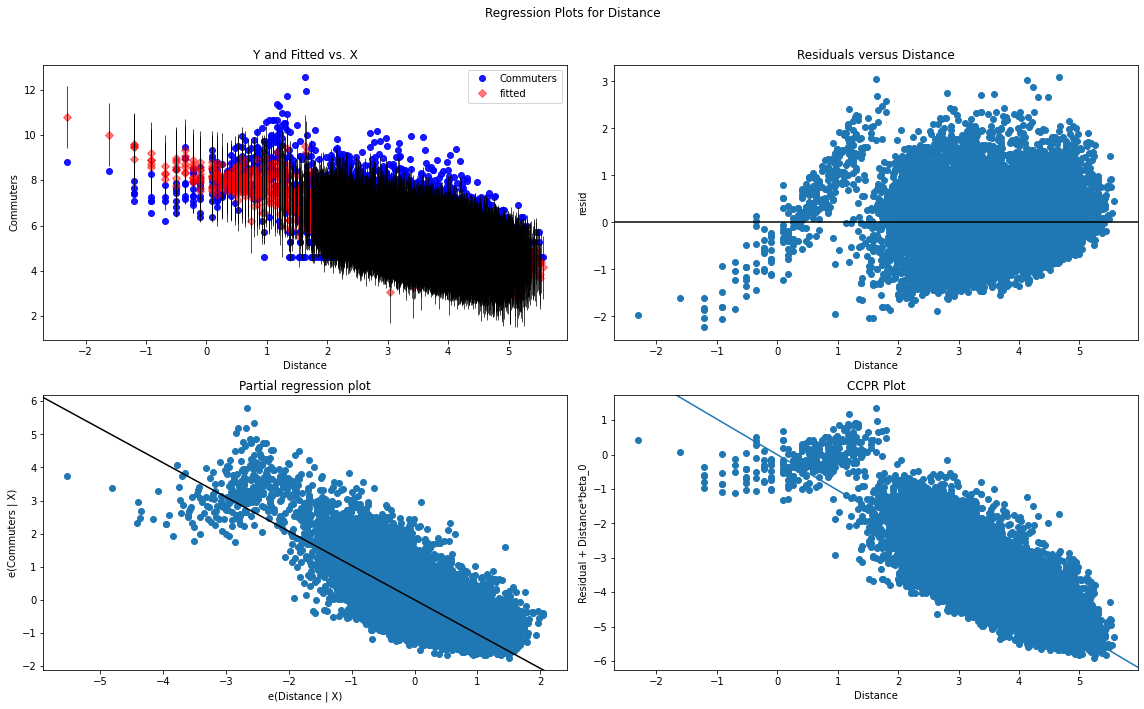

Partial Gravity Model of 2020 

<Wald test (chi2): statistic=1195.3586804050578, p-value=2.6987372432443305e-260, df_denom=2>
                                 OLS Regression Results                                
Dep. Variable:              Commuters   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.322e+05
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:03:54   Log-Likelihood:                         -12114.
No. Observations:               11468   AIC:                                  2.423e+04
Df Residuals:                   11465   BIC:                                  2.426e+04
Df Model:                           3                                                  
Covariance Type:                  HC1                                             

/Users/main/opt/miniconda3/envs/RA/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


eval_env: 1


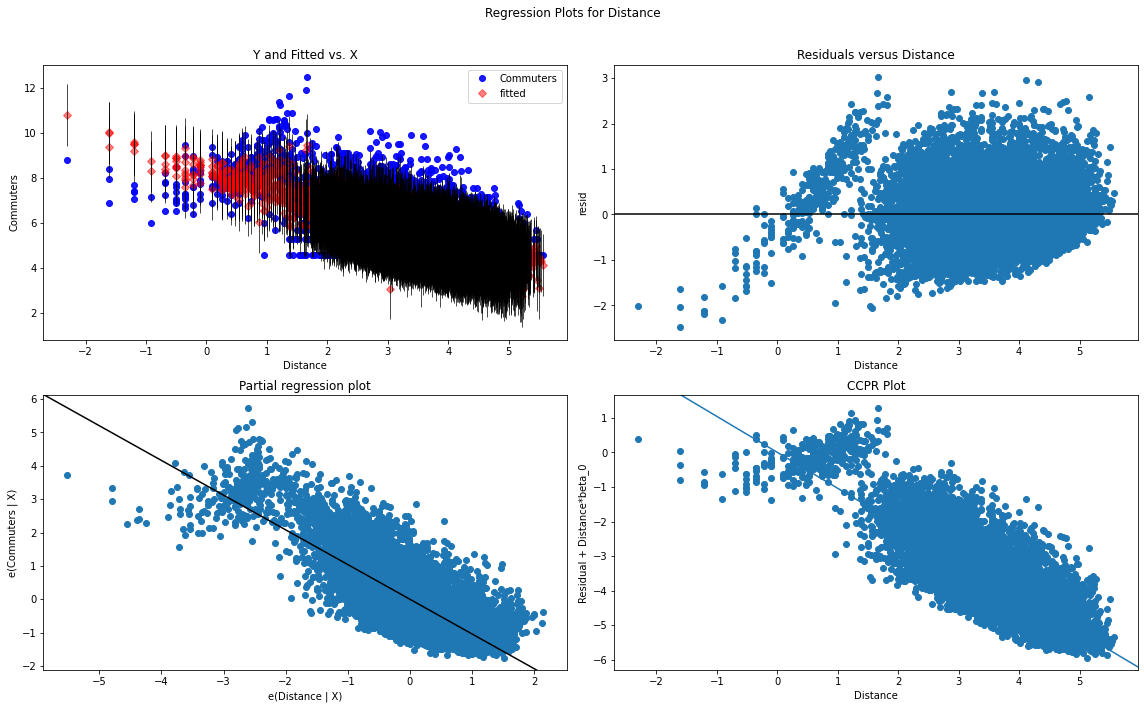

In [24]:
for i in range(2014, 2021, 1):
    print("Partial Gravity Model of %s \n" % i)
    partial_df = sm.add_constant(base_df[base_df['Year'] == i])
    df_endo_partial = partial_df['Commuters']
    del partial_df['Commuters']
    del partial_df['Year']
    partial_results = sm.OLS(df_endo_partial, partial_df).fit(cov_type='HC1')
    print(sm.stats.diagnostic.linear_reset(partial_results, power=3))
    set_of_results.append(partial_results)
    print(partial_results.summary())
    fig = plt.figure(figsize=(16, 10))
    fig = sm.graphics.plot_regress_exog(partial_results, 'Distance', fig=fig)
    plt.gcf()
    plt.savefig('Results/' + str(i) + 'ErrorGrid.png')
    plt.show()

## Latex Formatting

In [17]:
stargazer = Stargazer(set_of_results)
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lcccccccccc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{10}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{10-11}\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) & (9) & (10) \\\\\n\\hline \\\\[-1.8ex]\n Destination Pop & 0.589$^{***}$ & 0.575$^{***}$ & 0.587$^{***}$ & 0.475$^{***}$ & 0.484$^{***}$ & 0.489$^{***}$ & 0.495$^{***}$ & 0.495$^{***}$ & 0.502$^{***}$ & 0.504$^{***}$ \\\\\n  & (0.003) & (0.003) & (0.003) & (0.005) & (0.005) & (0.005) & (0.005) & (0.005) & (0.005) & (0.005) \\\\\n Distance & -1.051$^{***}$ & -1.044$^{***}$ & -1.045$^{***}$ & -0.955$^{***}$ & -0.969$^{***}$ & -0.987$^{***}$ & -1.016$^{***}$ & -1.008$^{***}$ & -1.035$^{***}$ & -1.040$^{***}$ \\\\\n  & (0.004) & (0.003) & (0.003) & (0.010) & (0.010) & (0.010) & (0.010) & (0.010) & (0.010) & (0.010) \\\\\n Origin Pop & 0.418$^{***}$ & 0.401$^{***}$ & 0.417$^{***}$ & 0.315$^{***}$ & 0.311$^{***}$ & 0.312$^{*